<img
  src="https://images.unsplash.com/photo-1629495025620-26d5f4ada7c2?q=80&w=2896&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
  alt="Example"
  style="
    width: 100%;           /* fill the container’s width */
    height: 400px;         /* force a fixed height */
    object-fit: cover;     /* scale+crop “inside” the box */
    display: block;        /* remove inline whitespace */
    margin: 0 auto;        /* center if you set a max-width */
  ">

<h2 align="center" style="font-weight: bold; color: #e67e22;">
  CSCN8010 Project – Exploring Global Happiness Through Data
</h2>


**Team 8:**
- Ponnu Peter, 9058740
- Madalina Tilvan, 9058215

## Framing the Problem

The goal of this project is to build different machine learning models that cna accurately make predictions and estimate a country's happiness score based on socio-economic and political features that might affect that score.

To address this problem, we will be exploring the following models:
1. Simple Linear Regression
2. Multiple Linear Regression
3. Random Forest Regression
4. Random Forest Classifier
5. K-Means
6. K-Nearest Neighbors
7. Decision Trees

### About the dataset
The *World Happiness Report* dataset contains features related to happiness, economic, social, and political indicators for different countries across multiple years.

**Number of Instances:** 4,000

**Number of Attributes:** 24 columns

**Timeframe:** 2005-2024

**Columns Overview:**

- `Country`: Name of the country.

- `Year`: The year of the record.

- `Happiness_Score`: A numerical value indicating the happiness level.

- `GDP_per_Capita`: Economic output per person.

- `Social_Support`: Level of social connections and support.

- `Healthy_Life_Expectancy`: Average life Expectancy at birth, for both sexes (years).

- `Freedom`: Perceived freedom in decision-making.

- `Generosity`: A measure of charitable behavior.

- `Corruption_Perception`: Perception of corruption in society.

- `Unemployment_Rate`: Percentage of unemployed individuals.

- `Education_Index`: A measure of education quality.

- `Population`: Total population of the country.

- `Urbanization_Rate`: Percentage of people living in urban areas.

- `Life_Satisfaction`: A subjective measure of well-being.

- `Public_Trust`: Confidence in public institutions.

- `Mental_Health_Index`: A measure of overall mental health.

- `Income_Inequality`: Economic disparity metric.

- `Public_Health_Expenditure`: Government spending on health.

- `Climate_Index`: A measure of climate conditions.

- `Work_Life_Balance`: An index measuring work-life balance.

- `Internet_Access`: Percentage of population with internet.

- `Crime_Rate`: Reported crime level.

- `Political_Stability`: A measure of political security. and absence of violence/terrorism

- `Employment_Rate`: Percentage of employed individuals.

In [39]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import geonamescache

pd.set_option('display.max_columns', None)

In [40]:
path = "dataset\World Happiness Report (2005-2023).csv"

happiness_df = pd.read_csv(path)
happiness_df.head()

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776


## Data Preprocessing

### 1. Detect and handle outliers

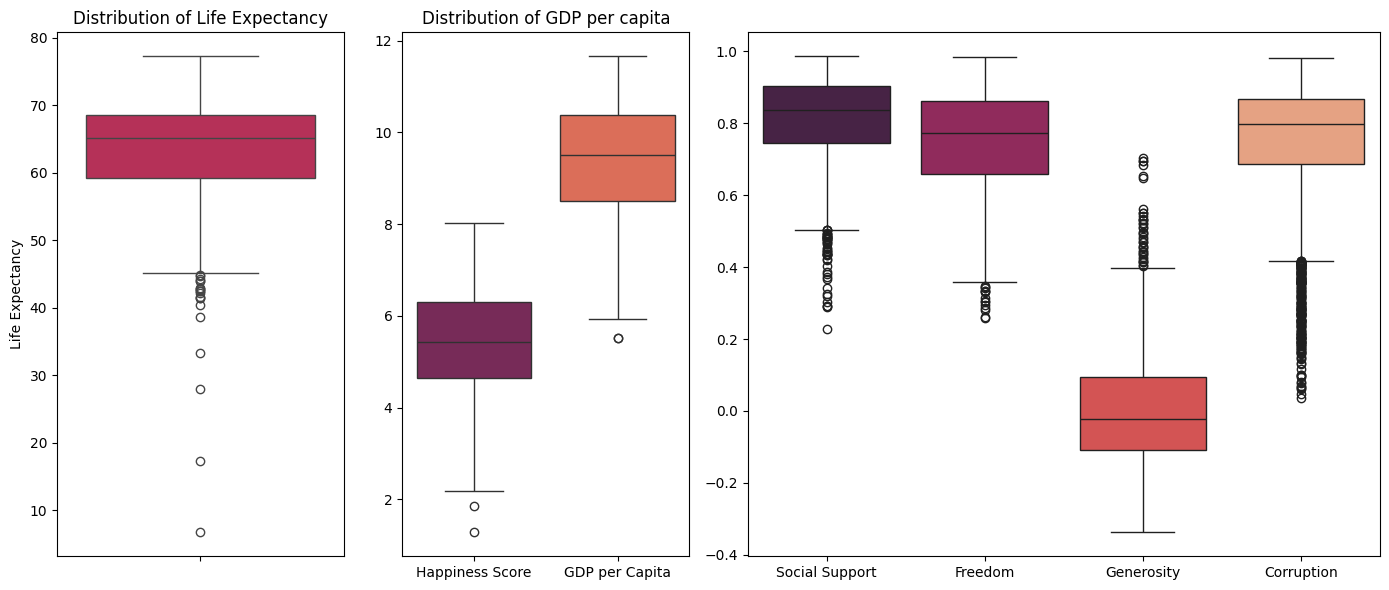

In [41]:
# Create subplots
fig = plt.figure(figsize=(14, 6))
gs = plt.GridSpec(nrows=1, ncols=4, figure=fig)

# Subplot for population
ax1 = fig.add_subplot(gs[0, 0]) 
sns.boxplot(data=happiness_df['Life Expectancy'], palette="rocket", ax=ax1)
ax1.set_title("Distribution of Life Expectancy")

# Subplot for GDP per capita
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=happiness_df[['Happiness Score', 'GDP per Capita']], palette="rocket", ax=ax2)
ax2.set_title("Distribution of GDP per capita")
# ax2.tick_params(axis='x', rotation=90)

# Subplot for GDP per capita
ax3 = fig.add_subplot(gs[0, 2:4])
sns.boxplot(data=happiness_df[['Social Support', 'Freedom', 'Generosity', 'Corruption']], palette="rocket", ax=ax3)
ax2.set_title("Distribution of GDP per capita")

# Show the plots
plt.tight_layout()
plt.show()

All of our features show outliers that need to be handled. For that we will use the IQR.

In [ ]:
for column in happiness_df.drop(columns=['Country','Year']).columns:
    Q1 = happiness_df[column].quantile(0.25)
    Q3 = happiness_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = happiness_df[(happiness_df[column] < lower_bound) | (happiness_df[column] > upper_bound)]

    happiness_df = happiness_df[(happiness_df[column] >= lower_bound) & (happiness_df[column] <= upper_bound)]

### 2. Handle missing values

Our dataset is free of any missing values.

In [43]:
missing_data = happiness_df.isna().mean()
missing_data.sort_values(ascending=False, inplace=True)
print(missing_data)

Corruption         0.049658
Generosity         0.031250
Life Expectancy    0.023545
Freedom            0.014127
GDP per Capita     0.008562
Social Support     0.005565
Country            0.000000
Year               0.000000
Happiness Score    0.000000
dtype: float64


In [44]:
imp = SimpleImputer(strategy='median')    # median is robust to outliers
cols = ['Corruption','Generosity','Life Expectancy','Freedom','GDP per Capita','Social Support']
happiness_df[cols] = imp.fit_transform(happiness_df[cols])

happiness_df.isna().sum()

Country            0
Year               0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

### 3. Investigate the existence of errors/inconsistencies
Let's check for duplicates, data types of logical inconsistencies that don't make sense in our dataset.


In [45]:
happiness_df.dtypes

Country             object
Year                 int64
Happiness Score    float64
GDP per Capita     float64
Social Support     float64
Life Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
dtype: object

In [46]:
happiness_df.describe()

,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
count,2336.000000,2336.00000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,2014.679795,5.48278,9.394247,0.810141,63.434494,0.750508,0.000742,0.746718
std,5.027398,1.12622,1.151557,0.121134,6.772118,0.137975,0.157560,0.181055
min,2005.000000,1.28100,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000
25%,2011.000000,4.64700,8.507000,0.746000,59.495000,0.661000,-0.106000,0.696750
50%,2015.000000,5.43900,9.502500,0.836000,65.100000,0.772000,-0.021000,0.799000
75%,2019.000000,6.31450,10.371500,0.905000,68.442500,0.859000,0.090000,0.864250
max,2023.000000,8.01900,11.664000,0.987000,77.280000,0.985000,0.703000,0.983000


The happiness dataset contains several features with different types of scales, as we observed earlier. These scales range from percentages and proportions (values between 0 and 1) to rates or large numerical values. Some features (`Social_Support`, `Freedom`, `Corruption_Perception`, `Public_Trust`, `Political_Stability`) are between 0 and 1, suggesting they might represent percentages or ratios. In contrast, other features have values ranging from 0 to 100 or even larger scales (in millions or billions).

This inconsistency in scales needs to be adressed to prevent models from being biased towards features with larger scales. In the next section, we will standardize and normalize the data to bring all the features to more comparable scales.

### 4. Feature engineering

Let's create a new column by combining `Public_Health_Epxenditure` and `Mental_Health_Index`. This new feature will help capture if investments in public health systems affect the mental health in each country. This will show if happiness is influenced by the prioritization of public mental health.

In [47]:
country_to_continent = pd.read_csv('dataset\countries_by_continents.csv')
happiness_df = pd.merge(happiness_df, country_to_continent, on='Country', how='left')

In [48]:
happiness_df.isna().sum()

Country            0
Year               0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
Continent          0
dtype: int64

### 5. Normalize numerical features

Features already normalized


In [49]:
happiness_df

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,Asia
...,...,...,...,...,...,...,...,...,...,...
2331,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,Africa
2332,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,Africa
2333,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,Africa
2334,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.070,0.753,Africa


In [50]:
numerical_features = happiness_df.drop(columns='Year').select_dtypes(include=['number'])

for col in numerical_features.columns:
    scaler = StandardScaler()
    numerical_features[col] = scaler.fit_transform(numerical_features[[col]])

print("Numerical features summary statistics:")
display(numerical_features.describe())

print("\nFirst 5 rows for numerical features:")
display(numerical_features.head())


Numerical features summary statistics:


,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
count,2.336000e+03,2.336000e+03,2.336000e+03,2.336000e+03,2.336000e+03,2336.000000,2.336000e+03
mean,-6.448419e-16,-2.159612e-16,-3.163375e-16,-1.289684e-15,-4.243181e-16,0.000000,-2.600659e-16
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214,1.000214e+00
min,-3.731669e+00,-3.358996e+00,-4.806778e+00,-8.376499e+00,-3.570307e+00,-2.150380,-3.931783e+00
25%,-7.422694e-01,-7.706407e-01,-5.296186e-01,-5.818471e-01,-6.488629e-01,-0.677614,-2.760404e-01
50%,-3.888132e-02,9.402628e-02,2.135172e-01,2.459885e-01,1.558028e-01,-0.138023,2.888250e-01
75%,7.386645e-01,8.488185e-01,7.832547e-01,7.396621e-01,7.864867e-01,0.566620,6.492892e-01
max,2.252459e+00,1.971452e+00,1.460334e+00,2.044925e+00,1.699891e+00,4.458023,1.305307e+00



First 5 rows for numerical features:


,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,-1.562001,-1.775583,-2.965453,-1.910372,-0.235656,1.061774,0.747347
1,-0.959858,-1.637479,-2.131489,-1.866063,-0.518377,1.207781,0.570567
2,-0.643689,-1.546279,-2.238831,-1.821754,-1.091067,0.763412,-0.219416
3,-1.466084,-1.574942,-2.387458,-1.777445,-1.844987,1.036381,-0.086831
4,-1.509602,-1.505456,-2.387458,-1.733137,-1.591264,1.506143,0.161765


In [51]:
happiness_merged = pd.concat([happiness_df[['Country', 'Year', 'Continent']], numerical_features], axis = 1)
# Normalized dataset 
happiness_merged.isna().sum()

Country            0
Year               0
Continent          0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

### 6. Encode categorical variables


In [52]:
continents_encoded = pd.get_dummies(happiness_df['Continent'], sparse = True, dtype='int')
continents_encoded

,Africa,Asia,Europe,North America,Oceania,South America
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
2331,1,0,0,0,0,0
2332,1,0,0,0,0,0
2333,1,0,0,0,0,0
2334,1,0,0,0,0,0


Now, let's merge it with our dataset.

In [53]:
happiness_merged = pd.concat([happiness_merged, continents_encoded], axis =1)
happiness_merged = happiness_merged.drop(columns='Continent')
happiness_merged.head()

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Afghanistan,2008,-1.562001,-1.775583,-2.965453,-1.910372,-0.235656,1.061774,0.747347,0,1,0,0,0,0
1,Afghanistan,2009,-0.959858,-1.637479,-2.131489,-1.866063,-0.518377,1.207781,0.570567,0,1,0,0,0,0
2,Afghanistan,2010,-0.643689,-1.546279,-2.238831,-1.821754,-1.091067,0.763412,-0.219416,0,1,0,0,0,0
3,Afghanistan,2011,-1.466084,-1.574942,-2.387458,-1.777445,-1.844987,1.036381,-0.086831,0,1,0,0,0,0
4,Afghanistan,2012,-1.509602,-1.505456,-2.387458,-1.733137,-1.591264,1.506143,0.161765,0,1,0,0,0,0


## Principal Component Analysis (PCA)

In [54]:
def perform_pca_analysis(dataset):
    # Apply PCA (keep all components)
    pca = PCA(n_components=len(dataset.columns))
    pca.fit(dataset)

    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Find the minimum number of components that explain at least 90% variance
    num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

    # Plot explained variance
    plt.figure(figsize=(18, 8))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label="Explained Variance")
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label="Cumulative Explained Variance")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Explained and Cumulative Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a DataFrame to show explained variance
    explained_variance_df = pd.DataFrame({
        "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
        "Explained Variance Ratio": explained_variance,
        "Cumulative Variance": cumulative_variance
    })

    # Print explained variance DataFrame
    print("\nExplained Variance Analysis:")
    print(explained_variance_df)

    # Get PCA component vectors (eigenvectors)
    pca_components_df = pd.DataFrame(pca.components_, columns=dataset.columns, index=[f"PC{i+1}" for i in range(len(dataset.columns))])

    # Print PCA component vectors
    print("\nPCA Component Vectors (Eigenvectors):")
    print(pca_components_df)
    return num_components_90 

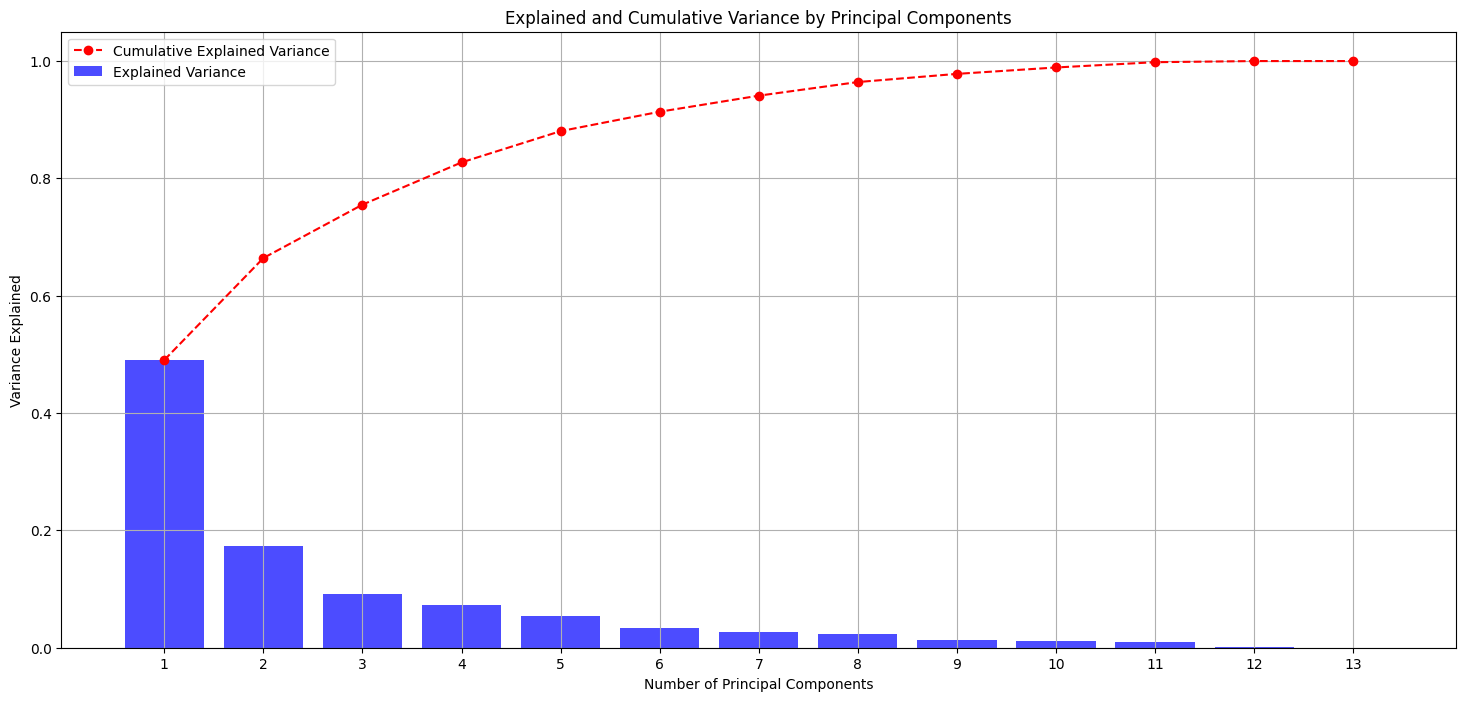


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.490493             0.490493
1                  PC2                  0.173738             0.664232
2                  PC3                  0.091014             0.755246
3                  PC4                  0.071990             0.827236
4                  PC5                  0.053324             0.880560
5                  PC6                  0.033065             0.913625
6                  PC7                  0.027370             0.940995
7                  PC8                  0.023221             0.964216
8                  PC9                  0.013922             0.978138
9                 PC10                  0.010914             0.989052
10                PC11                  0.008999             0.998051
11                PC12                  0.001949             1.000000
12                PC13                  0.000000            

In [55]:
num_pcs = perform_pca_analysis(happiness_merged.drop(columns=['Country','Year']))
print(f"\nMinimum number of PCA components needed for 90% variance: {num_pcs}")

When performing PCA analysis on whole cleaned dataset, we need at least `6` PCA components to explain `90%` of variance.

## Exploratory Data Analysis (EDA)

#### Correlation Heatmap

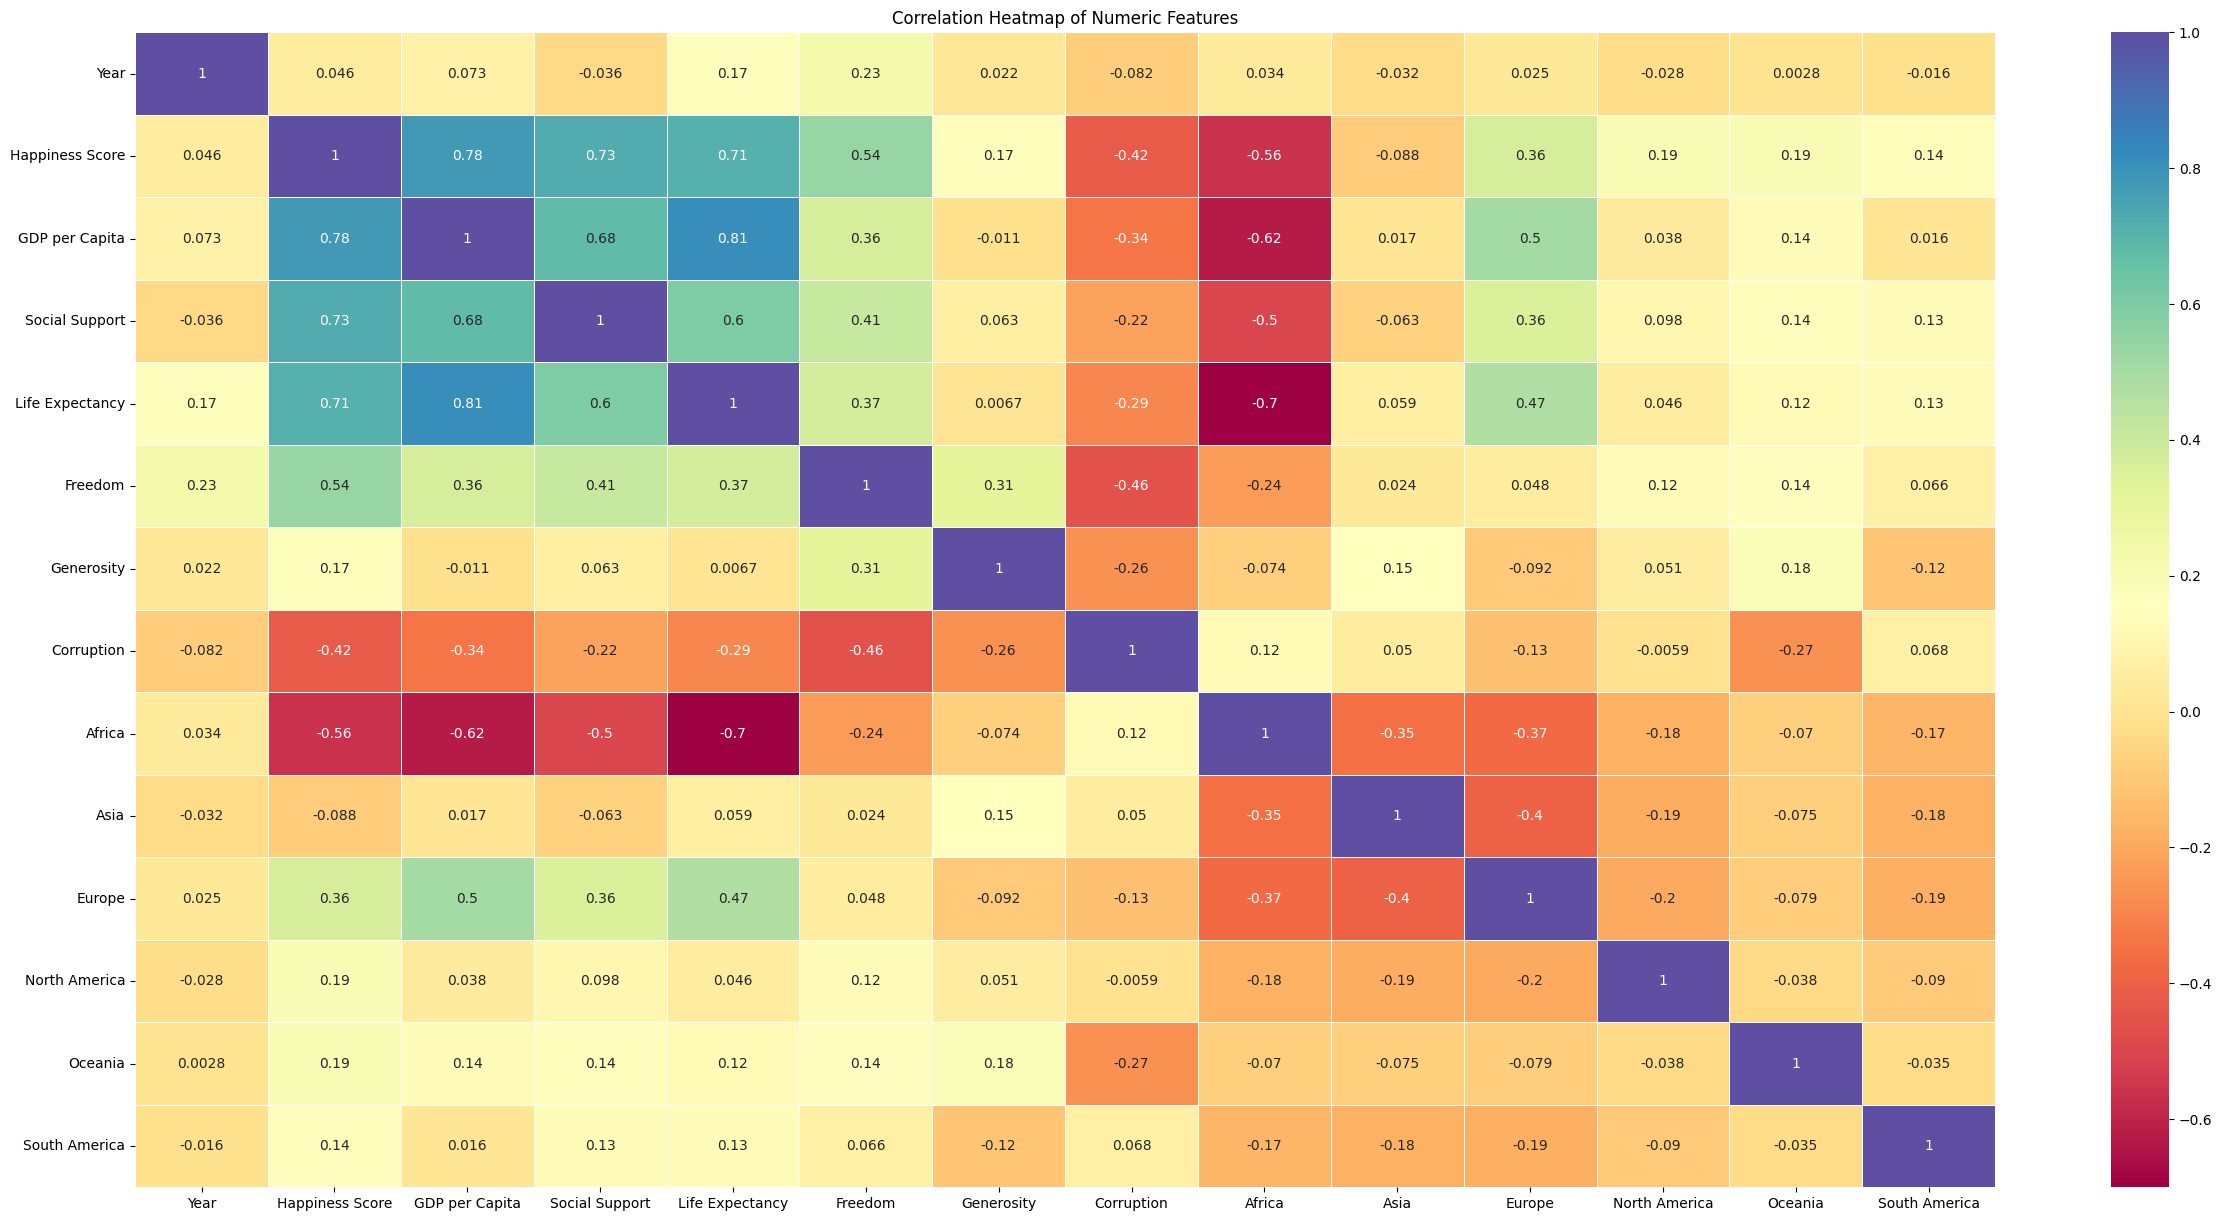

In [56]:
plt.figure(figsize=(30, 15))
sns.heatmap(happiness_merged.corr(numeric_only=True), annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The heatmap shows strong positive correlations between Happiness Score and GDP per Capita, Social Support, and Life Expectancy. Negative correlations are observed with Corruption and African regions. Regional indicators (Africa, Asia) tend to inversely relate to key well-being metrics, highlighting global disparities in happiness-related factors. 

#### Global Happiness Score Trend (2005–2023)

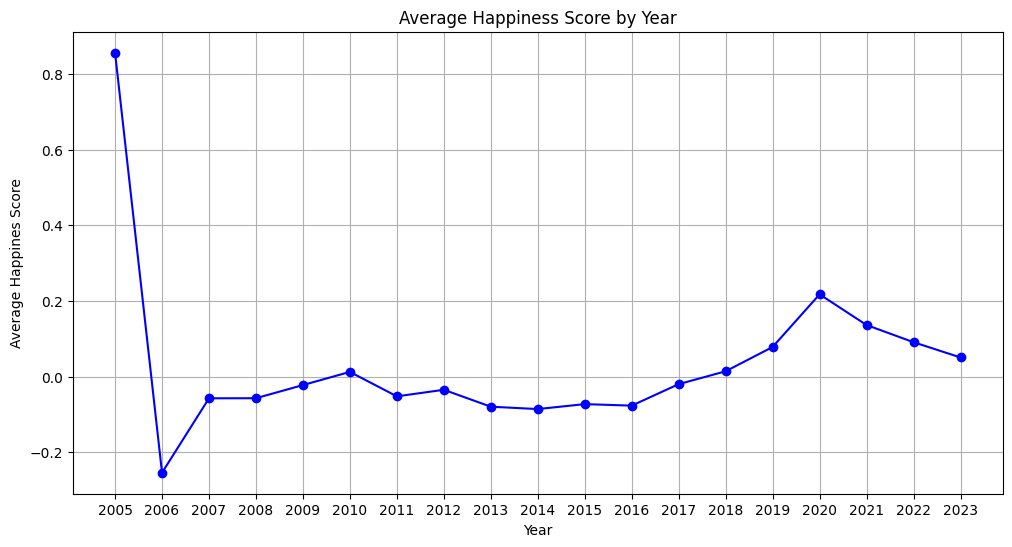

In [57]:
happiness_score = happiness_merged.groupby('Year')['Happiness Score'].mean().reset_index()
happiness_score.head(2)
#plot trends
plt.figure(figsize=(12,6))
plt.plot(happiness_score['Year'], happiness_score['Happiness Score'], marker='o', color='blue')
plt.title('Average Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Happines Score')
plt.xticks(happiness_score['Year'].unique())
plt.grid(True)
plt.show()

The line graph shows average happiness scores by year, revealing a sharp drop after 2005, followed by fluctuations around zero. A noticeable increase occurred between 2018 and 2020, peaking in 2020. However, scores slightly declined again from 2021 to 2023, indicating short-term improvement followed by a gradual dip.

#### Happiness Distribution

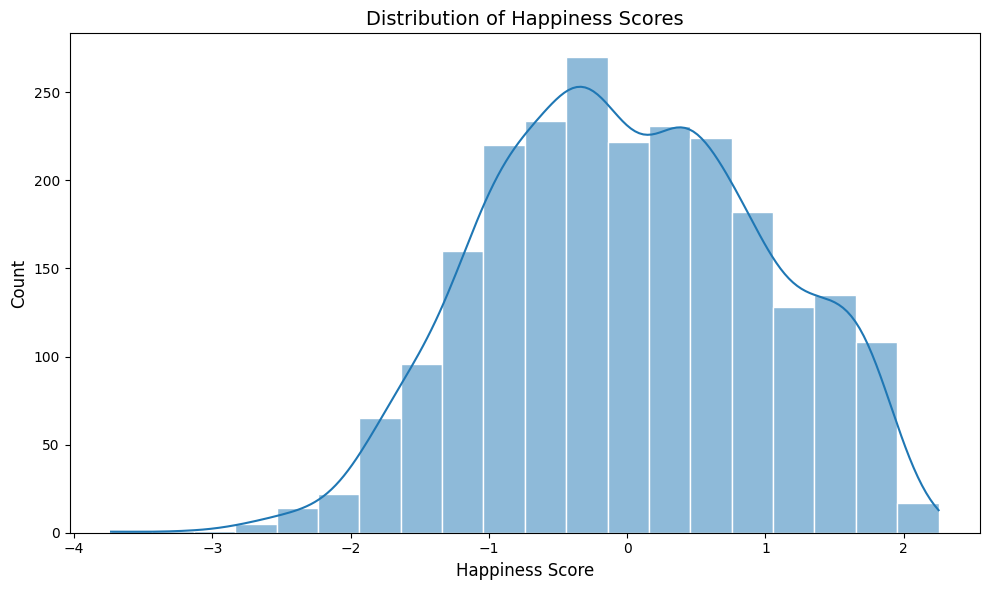

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=happiness_merged,
    x='Happiness Score',
    bins=20,        # adjust number of bins as you like
    kde=True,       # add a kernel density estimate
    edgecolor='w'   # white edges for clarity
)

plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The histogram displays the distribution of happiness scores, showing a roughly normal distribution centered around zero. Most countries have scores between -1.5 and 1.5, indicating moderate levels of happiness. There are fewer extremely low or high scores, suggesting that extreme happiness or unhappiness is less common across the dataset.

#### Top 5 Happiest Countries (Latest Year)

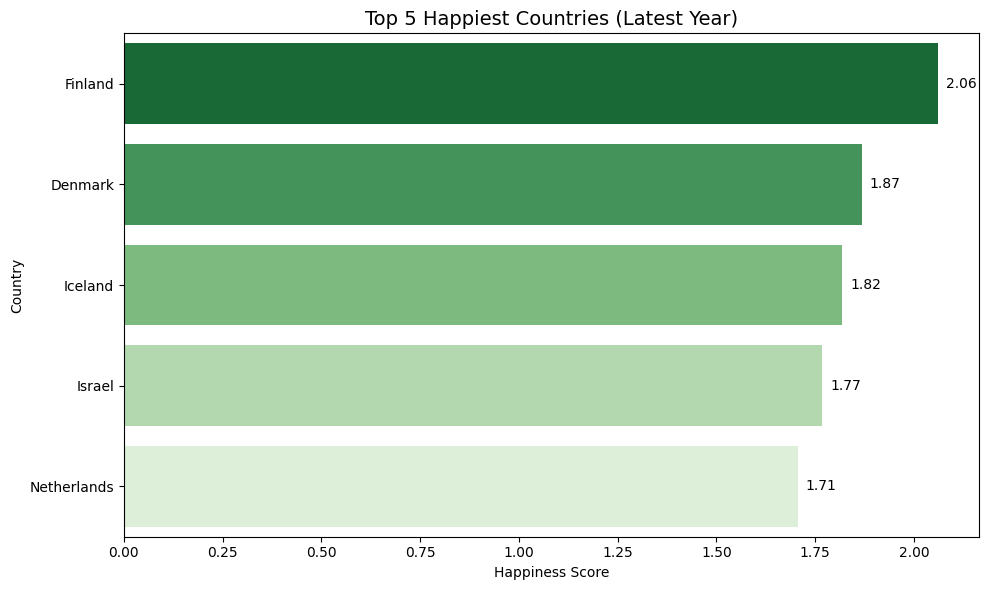

In [59]:
# Filter latest data and standardize country names
latest_year = happiness_merged['Year'].max()
latest_data = happiness_merged[happiness_merged['Year'] == latest_year].copy()

# Drop duplicates and sort top 5
latest_data_unique = latest_data.drop_duplicates(subset='Country')
top_5 = latest_data_unique.sort_values(by='Happiness Score', ascending=False).head(5).sort_values('Happiness Score')

# Plot top 5 happiest countries
top_colors = sns.color_palette("Greens", n_colors=5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness Score', y='Country', data=top_5, palette=top_colors)
plt.gca().invert_yaxis()
plt.title('Top 5 Happiest Countries (Latest Year)', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Add value labels
for i, v in enumerate(top_5['Happiness Score']):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()


The bar chart highlights the top 5 happiest countries in the latest year. Finland leads with the highest happiness score of 2.06, followed by Denmark (1.87) and Iceland (1.82). Israel and Netherlands round out the list with scores of 1.77 and 1.71, respectively, indicating strong well-being in these nations.

#### Global Happiness Overview for 10 Countries

In [60]:
#  Drop duplicate countries
latest_data_unique1 = latest_data.query("Year == @latest_year").drop_duplicates('Country')
latest_year = happiness_merged['Year'].max()

#  Add Latitude and Longitude
gc = geonamescache.GeonamesCache()

# dictionary of country (no lat/lon)
countries = gc.get_countries()   
# dictionary of city (has lat/lon)
cities = gc.get_cities()      

# Build country by matching each country’s capital
coordinates = {}
for c in countries.values():
    cname  = c['name']
    cap    = c['capital']
    iso2   = c['iso'] # 2‑letter code, e.g. 'US', 'CN'

    # find the city entry for that capital
    match = next(
        (ci for ci in cities.values()
         if ci['countrycode'] == iso2 and ci['name'] == cap),
        None
    )
    if match:
        coordinates[cname] = (
            float(match['latitude']),
            float(match['longitude'])
        )
    else:
        coordinates[cname] = (None, None)


# Map coordinates
latest_data_unique1['Latitude'] = latest_data_unique1['Country'].map(lambda x: coordinates.get(x, (None, None))[0])
latest_data_unique1['Longitude'] = latest_data_unique1['Country'].map(lambda x: coordinates.get(x, (None, None))[1])

# Add hover text
# latest_data_unique1['Hover'] = latest_data_unique1['Country'] + ': ' + latest_data_unique1['Happiness_Score'].astype(str)
# min_score = latest_data_unique1['Happiness_Score'].min()
# max_score = latest_data_unique1['Happiness_Score'].max()

# Create choropleth map
min_score = latest_data_unique1['Happiness Score'].min()
max_score = latest_data_unique1['Happiness Score'].max()

fig = px.choropleth(
    latest_data_unique1,
    locations='Country',
    locationmode='country names',
    color='Happiness Score',
    hover_name='Country',
    color_continuous_scale='RdYlGn',
    range_color=(min_score, max_score),
    title=f'Happiness Score by Country ({latest_year})'
)

# Final layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig.show()

The world map illustrates the Happiness Score by Country for 2023. Countries in Northern and Western Europe, North America, and Oceania display the highest happiness scores (darker green), while parts of Africa, the Middle East, and South Asia show the lowest scores (shaded red to orange), highlighting global disparities in well-being.

## Fitting Models

### Regression Models

#### 1. Linear Regression

In [61]:
y = happiness_merged['Happiness Score']
#  Drop categorical + target
X_all = happiness_merged.drop(columns=['Happiness Score', 'Year'])
# Get numeric features only
features = [col for col in X_all.columns if X_all[col].dtype in ['float64', 'int64']]
# Store results
results = []
predictions = {}
# Apply SLR for each feature
for feature in features:
    X = happiness_merged[[feature]]
    y = happiness_merged['Happiness Score']

    # Drop missing values
    Xy = pd.concat([X, y], axis=1).dropna()
    X = Xy[[feature]]
    y = Xy['Happiness Score']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[feature] = (y_test, y_pred)


- Model Performance Evaluation

In [62]:
# Evaluate R² for each feature
for feature, (y_test, y_pred) in predictions.items():
    r2 = r2_score(y_test, y_pred)
    results.append((feature, r2))
    print(f"{feature} → R²: {r2:.4f}")

GDP per Capita → R²: 0.5834
Social Support → R²: 0.4629
Life Expectancy → R²: 0.4777
Freedom → R²: 0.2364
Generosity → R²: 0.0273
Corruption → R²: 0.1280


Among the individual predictors of happiness:

- GDP per Capita showed the strongest relationship with Happiness Score (R² = 0.5834), indicating it explains nearly 58% of the variance.

- Life Expectancy (R² = 0.4777) and Social Support (R² = 0.4629) also had moderate explanatory power, making them important factors.

- Freedom (R² = 0.2364) had a weaker but still notable influence.

- Corruption (R² = 0.1280) and Generosity (R² = 0.0273) showed minimal explanatory power, suggesting weaker direct impact on happiness in isolation.

Overall, economic and health-related factors were the most predictive of happiness, while subjective and social factors had relatively less influence individually.

#### 2. Multiple Linear Regression

In [63]:
happiness_merged

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Afghanistan,2008,-1.562001,-1.775583,-2.965453,-1.910372,-0.235656,1.061774,0.747347,0,1,0,0,0,0
1,Afghanistan,2009,-0.959858,-1.637479,-2.131489,-1.866063,-0.518377,1.207781,0.570567,0,1,0,0,0,0
2,Afghanistan,2010,-0.643689,-1.546279,-2.238831,-1.821754,-1.091067,0.763412,-0.219416,0,1,0,0,0,0
3,Afghanistan,2011,-1.466084,-1.574942,-2.387458,-1.777445,-1.844987,1.036381,-0.086831,0,1,0,0,0,0
4,Afghanistan,2012,-1.509602,-1.505456,-2.387458,-1.733137,-1.591264,1.506143,0.161765,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,Zimbabwe,2019,-2.476761,-1.473318,-0.422277,-1.526362,-0.859091,-0.303074,0.465604,1,0,0,0,0,0
2332,Zimbabwe,2020,-2.062898,-1.561913,-0.769074,-1.456207,-0.779349,0.033377,0.233581,1,0,0,0,0,0
2333,Zimbabwe,2021,-2.067339,-1.508930,-1.033300,-1.386051,-0.598118,-0.487170,0.056802,1,0,0,0,0,0
2334,Zimbabwe,2022,-1.942115,-1.497638,-1.190184,-1.315896,-0.714106,-0.449081,0.034705,1,0,0,0,0,0


In [64]:
y=happiness_merged['Happiness Score']
X=happiness_merged.drop(columns=['Happiness Score', 'Country'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression Model
model_mlr=LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred_mlr=model_mlr.predict(X_test)


- Model Performance Evaluation

In [65]:
# Evaluate
print(f" R² Score: {r2_score(y_test, y_pred_mlr):.4f}")
print(f" Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlr):.4f}")
print(f" Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlr):.4f}")

 R² Score: 0.7441
 Mean Absolute Error (MAE): 0.3780
 Mean Squared Error (MSE): 0.2386


The multiple linear regression model demonstrated strong predictive performance:

- R² Score: 0.7441 - Approximately 74.4% of the variance in happiness scores is explained by the combined predictors, indicating a good overall fit.

- Mean Absolute Error (MAE): 0.3780 - On average, predictions deviate from actual happiness scores by 0.38 units, showing reasonably low error.

- Mean Squared Error (MSE): 0.2386 - The low MSE further confirms model accuracy and consistency.

Overall, the model performs well, especially when using multiple features together, and offers a more comprehensive explanation of happiness compared to individual predictors alone.

#### 3. Random Forest Regression

In [66]:
#Random Forest Regressor model
y=happiness_merged['Happiness Score']
x= happiness_merged.drop(columns='Happiness Score')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_rf=RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf=model_rf.predict(X_test)


- Model Performance Evaluation

In [67]:
#Evaluate
print(f" R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f" Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f" Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.4f}")

 R² Score: 0.8826
 Mean Absolute Error (MAE): 0.2555
 Mean Squared Error (MSE): 0.1165


The Random Forest model outperformed linear regression models, delivering high accuracy and low error:

- R² Score: 0.8826 - The model explains approximately 88.3% of the variance in happiness scores, indicating a very strong fit.

- Mean Absolute Error (MAE): 0.2555 - Predictions are, on average, only 0.26 units off from actual values — a significant improvement in precision.

- Mean Squared Error (MSE): 0.1165 - The low MSE confirms the model’s high consistency and robustness.

Random Forest is the best-performing model so far, capturing complex patterns and interactions in the data more effectively than linear approaches.



- Residual Plot

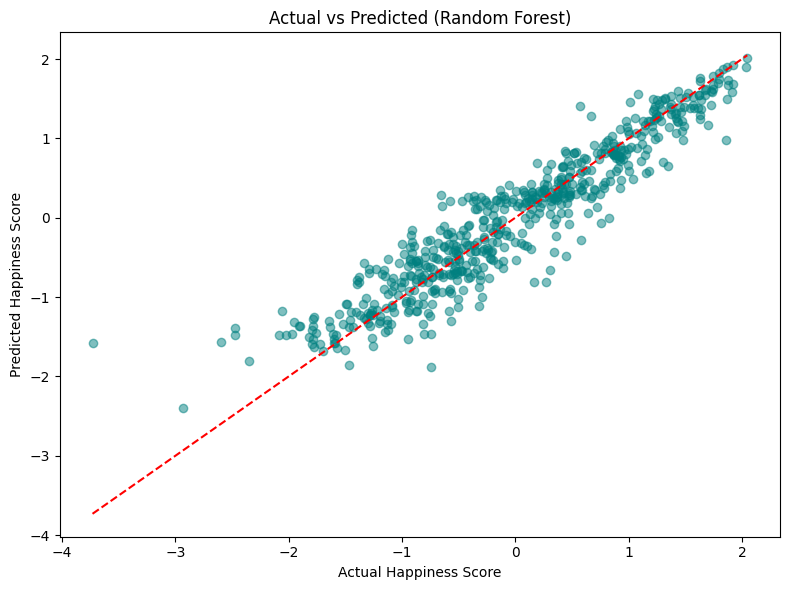

In [68]:
#residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted (Random Forest)')
plt.tight_layout()
plt.show()

The scatter plot displays actual vs. predicted happiness scores using the Random Forest model. Most points lie close to the red diagonal line, indicating strong agreement between predictions and true values. The tight clustering around the line confirms the model’s high accuracy and generalization, with minimal large prediction errors.

### Classification Models

#### 3. Random Forest Classifier

In [69]:
#  Convert Happiness Score to Binary
def binary_happiness(score):
    if score < 0:
        return 0  # Unhappy
    else:
        return 1  # Happy

happiness_merged['Happiness Binary'] = happiness_merged['Happiness Score'].apply(binary_happiness)

X = happiness_merged.drop(columns=['Happiness Score', 'Happiness Binary'])
X = pd.get_dummies(X, drop_first=True)  
y = happiness_merged['Happiness Binary']

#Applying SMOTE for Class Balancing
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, stratify=y_bal, random_state=42)

#Train model
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

#Predict
y_pred_rfc = model_rfc.predict(X_test)

- Model Performance Evaluation


 Accuracy: 0.9334
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       301
           1       0.94      0.93      0.93       300

    accuracy                           0.93       601
   macro avg       0.93      0.93      0.93       601
weighted avg       0.93      0.93      0.93       601



<Figure size 600x400 with 0 Axes>

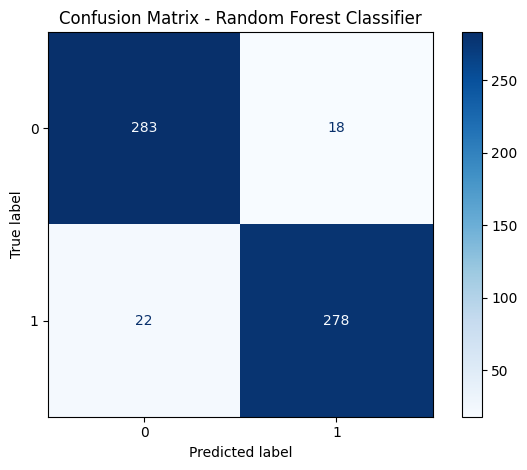

In [70]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f" Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

#  Confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model_rfc, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()


#### Interpretation
- Overall Accuracy: 93.34% ->The model correctly classified 561 out of 601 instances, showing strong overall performance..

- High precision and recall for both classes indicate the model performs equally well in identifying both categories.

- True Negatives (283) and True Positives (278) are both high.

- Only 18 false positives and 22 false negatives, indicating low misclassification.

- The Random Forest Classifier is performing exceptionally well, with high precision, recall, and F1-scores. The confusion matrix supports this, showing that the model is both accurate and reliable for binary classification tasks in this context.

- ROC curve

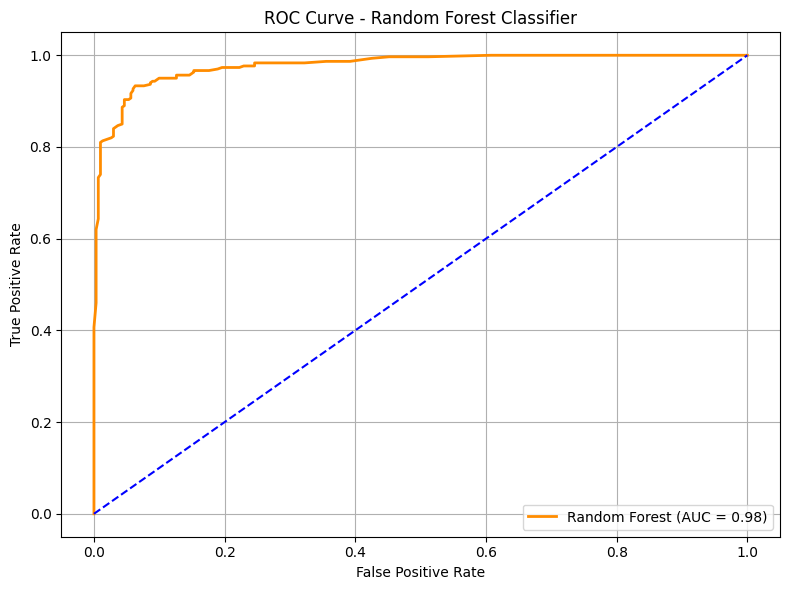

In [71]:
#predicted probabilities for class 1 (Happy)
y_probs = model_rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC curve shows the performance of the Random Forest classifier across different thresholds. The model achieves an AUC score of 0.98, indicating excellent discrimination between the two classes. The curve hugs the top-left corner, suggesting a very high true positive rate with a low false positive rate, confirming the model’s outstanding classification ability.

#### 4. Decision Trees

In [72]:
y_pred_dt = regressor_dt.predict(test_set.drop(columns=['Happiness.Score']))

# Creating a DataFrame to compare actual and predicted values
Pred_Actual_dt = pd.DataFrame({
    'Prediction': y_pred_dt,
    'Actual': test_set['Happiness.Score']
})

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Pred_Actual_dt['Actual'], Pred_Actual_dt['Prediction'])
plt.plot([Pred_Actual_dt['Actual'].min(), Pred_Actual_dt['Actual'].max()],
         [Pred_Actual_dt['Actual'].min(), Pred_Actual_dt['Actual'].max()],
         color='red', lw=2)  # The line representing perfect prediction
plt.title("Decision Tree Regression")
plt.xlabel("Actual happiness score")
plt.ylabel("Predicted happiness score")
plt.grid(True)
plt.show()

# Plotting the decision tree itself using plot_tree from sklearn
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(regressor_dt, filled=True, feature_names=test_set.drop(columns=['Happiness.Score']).columns)
plt.show()

NameError: name 'regressor_dt' is not defined

### Clustering Models

#### 5. K-Means

#### 6. K-Nearest Neighbors (KNN)

## Conclusions